## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Importing DataSet

In [2]:
df_train= pd.read_csv("C:/Users/Dell/Desktop/Train.csv")
df_test= pd.read_csv("C:/Users/Dell/Desktop/Test.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

## Data Cleaning

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Item_Weight is a numerical column so we perform Mean Imputation

In [9]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [10]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### Outlet_Size is a catagorical column so we perform Mode Imputation

In [13]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Feature Selection

In [18]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [19]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Exploratory Data Analysis using Pandas Profiling

In [20]:
!pip install pandas-profiling

In [21]:
from pandas_profiling import ProfileReport

In [22]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [23]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## EDA using Klib 

In [24]:
!pip install klib

In [25]:
import klib

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

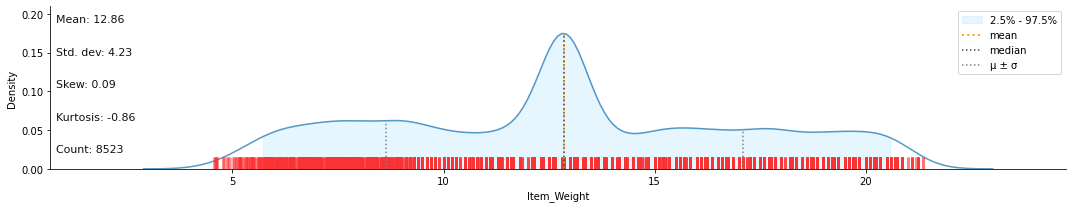

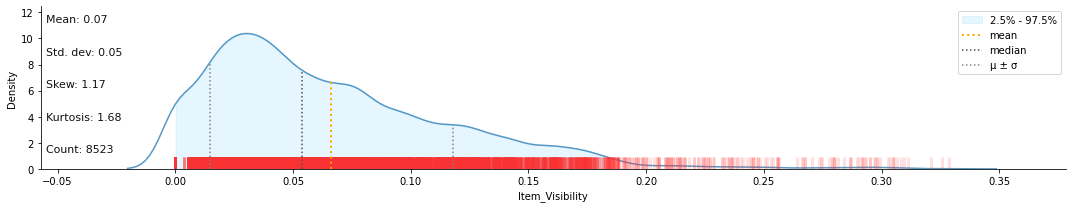

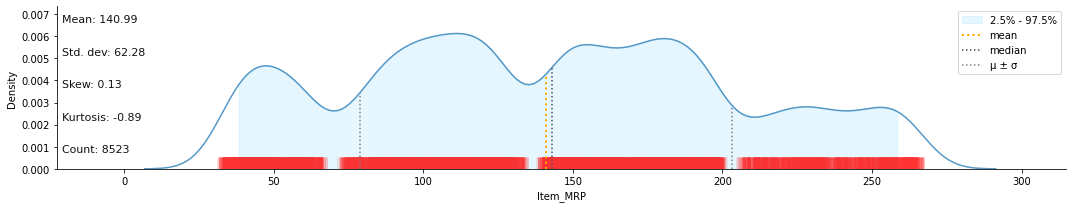

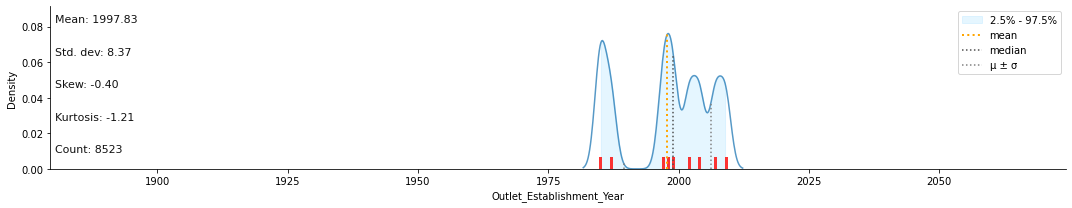

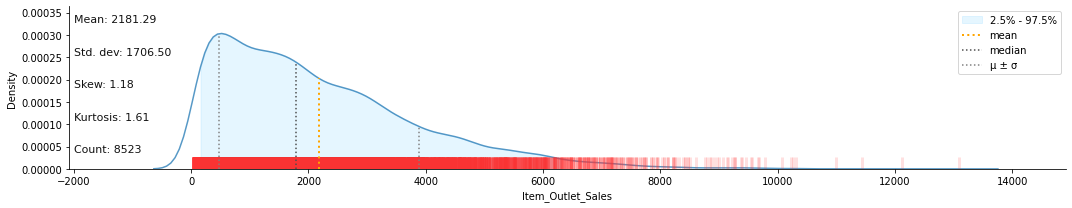

In [26]:
klib.dist_plot(df_train)

In [27]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


# Data Cleaning using klib library

In [28]:
klib.data_cleaning(df_train)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [29]:
klib.clean_column_names(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Memory Reduction (Changing to more efficient Datatypes)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [31]:
df_train=klib.convert_datatypes(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


## Data Preprocessing 

In [32]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df_train.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200


In [35]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type'] = le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])                                               

In [36]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


### One Hot Encoding

In [37]:
df_train = pd.get_dummies(df_train, columns=['item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type'])

In [38]:
df_train

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,...,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
0,9.300000,0.016047,4,249.809204,1999,3735.137939,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920000,0.019278,14,48.269199,2009,443.422791,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500000,0.016760,10,141.617996,1999,2097.270020,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200001,0.000000,6,182.095001,1998,732.380005,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930000,0.000000,9,53.861401,1987,994.705200,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,13,214.521805,1987,2778.383301,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380000,0.046982,0,108.156998,2002,549.284973,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600000,0.035186,8,85.122398,2004,1193.113647,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210000,0.145221,13,103.133202,2009,1845.597656,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## Splitting Data into Train and Test

In [39]:
X = df_train.drop('item_outlet_sales', axis = 1)

In [40]:
X

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
0,9.300000,0.016047,4,249.809204,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.920000,0.019278,14,48.269199,2009,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,17.500000,0.016760,10,141.617996,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.200001,0.000000,6,182.095001,1998,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,8.930000,0.000000,9,53.861401,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,13,214.521805,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
8519,8.380000,0.046982,0,108.156998,2002,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8520,10.600000,0.035186,8,85.122398,2004,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7.210000,0.145221,13,103.133202,2009,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [41]:
Y = df_train['item_outlet_sales']

In [42]:
Y

0       3735.137939
1        443.422791
2       2097.270020
3        732.380005
4        994.705200
           ...     
8518    2778.383301
8519     549.284973
8520    1193.113647
8521    1845.597656
8522     765.669983
Name: item_outlet_sales, Length: 8523, dtype: float32

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=101, test_size=0.2)

In [44]:
X_train

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
3684,19.250000,0.101689,4,54.695599,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
1935,7.630000,0.061410,14,94.643600,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
5142,19.350000,0.065891,10,167.081604,2007,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4978,6.380000,0.031898,4,177.434402,1997,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
2299,16.700001,0.022110,4,110.888603,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,5.000000,0.044005,14,188.852997,1997,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
5695,14.650000,0.170664,7,56.461399,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
8006,12.500000,0.018849,8,96.738403,1997,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
1361,9.695000,0.129009,0,226.940399,2007,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [45]:
X_test

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
8179,11.000000,0.055163,8,100.335800,2009,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
8355,18.000000,0.038979,13,148.641800,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3411,7.720000,0.074731,1,77.598602,1997,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7089,20.700001,0.049035,6,39.950600,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
6954,7.550000,0.027225,3,152.934006,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,16.750000,0.105019,13,155.263000,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4996,8.520000,0.027059,14,153.368195,1997,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
531,15.600000,0.111686,11,184.792404,1998,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3891,17.100000,0.000000,9,114.685997,2009,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [46]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [47]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

## Standardization

In [48]:
X.describe()

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858088,0.066132,7.226681,140.992767,1997.831867,0.037076,0.597090,0.338965,0.013141,0.013728,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226130,0.051598,4.209990,62.275051,8.371760,0.188960,0.490512,0.473386,0.113885,0.116365,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,4.000000,93.826500,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,6.000000,143.012802,1999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,10.000000,185.643700,2004.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,15.000000,266.888397,2009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
import joblib

In [51]:
joblib.dump(sc,r"C:\Users\Dell\Desktop\model\sc.sav")

['C:\\Users\\Dell\\Desktop\\model\\sc.sav']

In [52]:
X_train_std = sc.fit_transform(X_train)

In [53]:
X_test_std = sc.transform(X_test)

In [54]:
X_train_std

array([[ 1.52290023,  0.68469731, -0.75847359, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.239856  , -0.09514746,  1.60759199, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 1.54667619, -0.0083859 ,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [-0.08197109, -0.91916229,  0.18795264, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.74888436,  1.21363045, -1.70489982, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.67885675,  1.83915361,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513]])

In [55]:
X_test_std

array([[-0.43860916, -0.21609253,  0.18795264, ..., -1.36686554,
         2.8659228 , -0.35759513],
       [ 1.22570184, -0.52943464,  1.37098543, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.2184578 ,  0.16277341, -1.46829326, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.65508101,  0.8782423 ,  0.89777232, ..., -1.36686554,
        -0.34892775, -0.35759513],
       [ 1.01171909, -1.28409256,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513],
       [-1.56558541, -1.09265374,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513]])

## Model Building using Linear Regression & Random Forest 

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [57]:
lr.fit(X_train_std, Y_train)

LinearRegression()

In [58]:
Y_pred_lr = lr.predict(X_test_std)

In [59]:
X_test.head()

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,item_fat_content_4,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
8179,11.000000,0.055163,8,100.335800,2009,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
8355,18.000000,0.038979,13,148.641800,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3411,7.720000,0.074731,1,77.598602,1997,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
7089,20.700001,0.049035,6,39.950600,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
6954,7.550000,0.027225,3,152.934006,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [60]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [62]:
print(r2_score(Y_test, Y_pred_lr))
print(mean_absolute_error(Y_test, Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))

0.5578026550822711
824.0018664561157
1097.7928075441857


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [64]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [65]:
joblib.dump(rf,r"C:\Users\Dell\Desktop\model\rf.sav")

['C:\\Users\\Dell\\Desktop\\model\\rf.sav']

In [66]:
Y_pred_rf = rf.predict(X_test)

In [67]:
print(r2_score(Y_test, Y_pred_rf))
print(mean_absolute_error(Y_test, Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))

0.5438623124223948
783.1806812167573
1114.9625852596855


## Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10,100,1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1, 0.1)
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = np.linspace(0.1,1.0,10)

# define grid search 
grid = dict(n_estimators = n_estimators)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                               scoring='r2',error_score=0,verbose=2,cv=2)
grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best; {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3}({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best; 0.551 using {'n_estimators': 1000}
0.511(0.001) with: {'n_estimators': 10}
0.545(0.008) with: {'n_estimators': 100}
0.551(0.006) with: {'n_estimators': 1000}


In [69]:
grid_search_forest.best_params_

{'n_estimators': 1000}

## Saving the Model

In [70]:
import joblib

In [71]:
joblib.dump(grid_search_forest,r"C:\Users\Dell\Desktop\model\Random_forest_grid.sav")

['C:\\Users\\Dell\\Desktop\\model\\Random_forest_grid.sav']

In [72]:
model = joblib.load(r"C:\Users\Dell\Desktop\model\Random_forest_grid.sav")

In [73]:
print(model.predict(X_test_std))

[1712.42695108 3534.90792023 1304.30753986 ...  402.4028614  1694.46833502
 2462.0511955 ]
